In [1]:
import cmocean as cmo
import matplotlib.pyplot as plt
import numpy as np
import time
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import xarray as xr
from xmitgcm import open_mdsdataset

In [2]:
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')

There is a problem with Dask chunks, even if I'm explicitly saying chunks=None it just ignores me :-( and doing anything in the time axis takes a million years. Even trying to plot a simple time series. That is why I ended up doing the horrible piece of code below and saved the data.

In [2]:
sns.set_context('talk')

In [3]:
outdir = '/data/SO2/sio-kramosmusalem/exp06_512x612x100_ORL_SVB/04_SVB_augTS_output/'
outdir2 = '/data/SO2/sio-kramosmusalem/exp06_512x612x100_ORL/04_noSVB_augTS/'

levels = [1,   2,  3,  4,  5,  6,  7,  8,  9, 10, 
          11, 12, 13, 14, 15, 16, 17,
          18, 19, 20, 21, 22, 23, 24, 25,
          26, 27, 28, 29, 30, 31,
          32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44,
          45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57,              
          58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 
          74, 79, 84, 89, 94, 99,]
ds = open_mdsdataset(outdir, prefix=['eta','dynVars'], levels=levels,
                     #iters=[ii for ii in range(10,7210,10)],
                     chunks=None)
ds2 = open_mdsdataset(outdir2, prefix=['eta','dynVars'], levels=levels,
                     #iters=[ii for ii in range(10,7210,10)],
                     chunks=None)

In [4]:
depth_nob = ds2.Depth[:]
LAT = ds2['YC'][:]
LON = ds2['XC'][:]-360
lat = ds2.YC[:,0].data
lon = ds2.XC[0,:].data-360
Z = ds2['Z'][:]
Zl = ds2['Zl'][:]

# centers mask
hFacC = ds2['hFacC'][:]
hfac = np.ma.masked_values(hFacC, 0)
mask = np.ma.getmask(hfac)
dep_masked = np.ma.masked_values(depth_nob,0)
mask_dep = np.ma.getmask(dep_masked)
time = np.arange(0,720)*600

# centers mask bathy with bay
depth_bay = ds.Depth[:]
hFacCSVB = ds['hFacC'][:]
hfacSVB = np.ma.masked_values(hFacCSVB, 0)
maskSVB = np.ma.getmask(hfacSVB)

#
omega = 7.3E-5
N200 = 
N500 = 0.003614



Stations where we will investigate SVB-induced vwerical velocity, w:

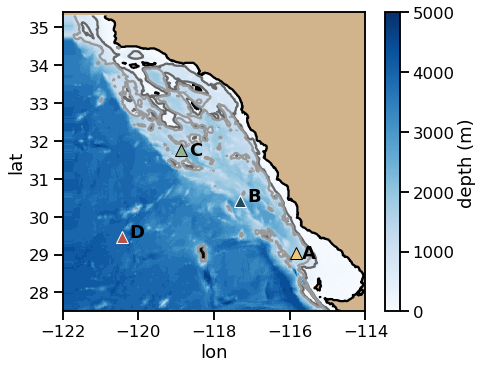

In [5]:
# Plot bay and approximate distances and reference circle
fig, (ax1) = plt.subplots(1,1,figsize=(7,5.5), sharey=True)
ax1.set_facecolor('tan')
pc1 = ax1.pcolormesh(lon,lat, np.ma.masked_array(depth_bay,mask=maskSVB[0,:,:]), 
                     cmap='Blues', vmin=0, vmax=5000)
plt.colorbar(pc1, ax=ax1, label='depth (m)')
ax1.contour(lon,lat,depth_bay,levels=[0,500, 1000], 
            colors=['k','0.4','0.6'], 
            alphas=[1,0.2,0.2])                                                                           
ax1.set_xlabel('lon')
ax1.set_ylabel('lat')
ax1.set_aspect(1)
ax1.set_xlim([-122,-114])
ax1.set_ylim([27.5,35.4])

pta = [100,180]
ptb = [395,150]
ptc = [200,350]
ptd = [300,250]
colors = [ "#b75347", "#edc775", "#94b594", "#224b5e"]
ax1.plot(lon[pta[0]], lat[pta[1]], '^', color=colors[0],
         markeredgecolor='1', markersize=12)
ax1.plot(lon[ptb[0]], lat[ptb[1]], '^', color=colors[1],
         markeredgecolor='0', markersize=12)
ax1.plot(lon[ptc[0]], lat[ptc[1]], '^', color=colors[2],
         markeredgecolor='0', markersize=12)
ax1.plot(lon[ptd[0]], lat[ptd[1]], '^', color=colors[3],
         markeredgecolor='1', markersize=12)

ax1.text(lon[pta[0]]+0.2, lat[pta[1]], 'D', fontweight='bold', color='k')
ax1.text(lon[ptb[0]]+0.15, lat[ptb[1]]-0.15, 'A', fontweight='bold')
ax1.text(lon[ptc[0]]+0.2, lat[ptc[1]]-0.15, 'C', fontweight='bold')
ax1.text(lon[ptd[0]]+0.2, lat[ptd[1]], 'B', fontweight='bold')

plt.show()

In [6]:
z2 = 37 # Zl[37] = -197.2 m
z4 = 55 # Zl[55] = -508.2 m
dt = 10*60

## This is the horrible code mentioned at the beginning. Don't uncomment unless 
## you want to change the stations or depths.
Wa = ds.WVEL[:,z2,pta[1], pta[0]].data-ds2.WVEL[:,z2,pta[1], pta[0]].data
Wb = ds.WVEL[:,z2,ptb[1], ptb[0]].data-ds2.WVEL[:,z2,ptb[1], ptb[0]].data
Wc = ds.WVEL[:,z2,ptc[1], ptc[0]].data-ds2.WVEL[:,z2,ptc[1], ptc[0]].data
Wd = ds.WVEL[:,z2,ptd[1], ptd[0]].data-ds2.WVEL[:,z2,ptd[1], ptd[0]].data

Wa2 = ds.WVEL[:,z4,pta[1], pta[0]].data-ds2.WVEL[:,z4,pta[1], pta[0]].data
Wb2 = ds.WVEL[:,z4,ptb[1], ptb[0]].data-ds2.WVEL[:,z4,ptb[1], ptb[0]].data
Wc2 = ds.WVEL[:,z4,ptc[1], ptc[0]].data-ds2.WVEL[:,z4,ptc[1], ptc[0]].data
Wd2 = ds.WVEL[:,z4,ptd[1], ptd[0]].data-ds2.WVEL[:,z4,ptd[1], ptd[0]].data


wvec = np.zeros((4,len(Wa)))
wvec2 = np.zeros((4,len(Wa2)))

for tt in range(len(Wa)):
    wvec[0,tt] = Wa[tt]
    wvec[1,tt] = Wb[tt]
    wvec[2,tt] = Wc[tt]
    wvec[3,tt] = Wd[tt]

    wvec2[0,tt] = Wa2[tt]
    wvec2[1,tt] = Wb2[tt]
    wvec2[2,tt] = Wc2[tt]
    wvec2[3,tt] = Wd2[tt]
    print(tt)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

In [7]:
times = np.arange(720)*600

In [8]:
np.savez('w_4stations_AugTS', w200=wvec, w500=wvec2, time=times, 
         lats=[pta[1], ptb[1], ptc[1], ptd[1]], 
         lons=[pta[0], ptb[0], ptc[0], ptd[0]])

In [9]:
## Once I ran the horrible code above, 
## I can just load the timeseries instead.

var = np.load('w_4stations_AugTS.npz')

w at 200 m and 500 m, 5 days:

Text(0.5, 1.0, '500 m depth')

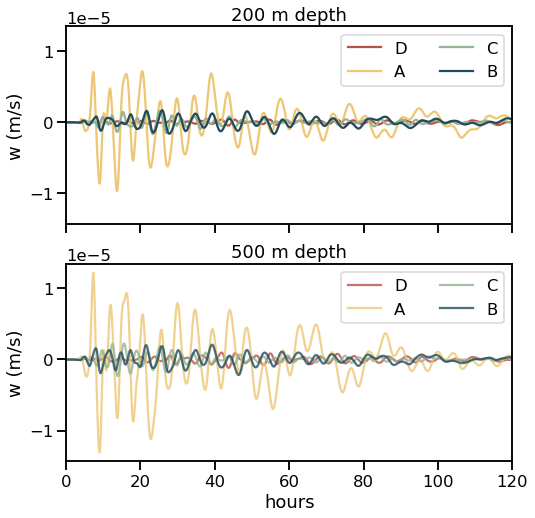

In [10]:
fig, (ax,ax2) = plt.subplots(2,1,figsize=(8,8), sharex=True, sharey=True)
ax.plot(times[:]/3600, var['w200'][0,:], label='D', 
        color=colors[0], alpha=1)
ax.plot(times[:]/3600, var['w200'][1,:], label='A', 
        color=colors[1], alpha=1)
ax.plot(times[:]/3600, var['w200'][2,:], label='C', 
        color=colors[2], alpha=1)
ax.plot(times[:]/3600, var['w200'][3,:], label='B', 
        color=colors[3], alpha=1)
ax.legend(ncol=2)
ax.set_xlim(0,24*5)
ax.set_ylabel('w (m/s)')
ax.set_title('200 m depth')

ax2.plot(times[:]/3600, var['w500'][0,:], label='D', 
         color=colors[0], alpha=0.8)
ax2.plot(times[:]/3600, var['w500'][1,:], label='A', 
         color=colors[1], alpha=0.8)
ax2.plot(times[:]/3600, var['w500'][2,:], label='C', 
         color=colors[2], alpha=0.8)
ax2.plot(times[:]/3600, var['w500'][3,:], label='B', 
         color=colors[3], alpha=0.8)
ax2.legend(ncol=2)
ax2.set_xlim(0,24*5)
ax2.set_xlabel('hours')
ax2.set_ylabel('w (m/s)')
ax2.set_title('500 m depth')

w at 200 m and 500 m, 1 day:

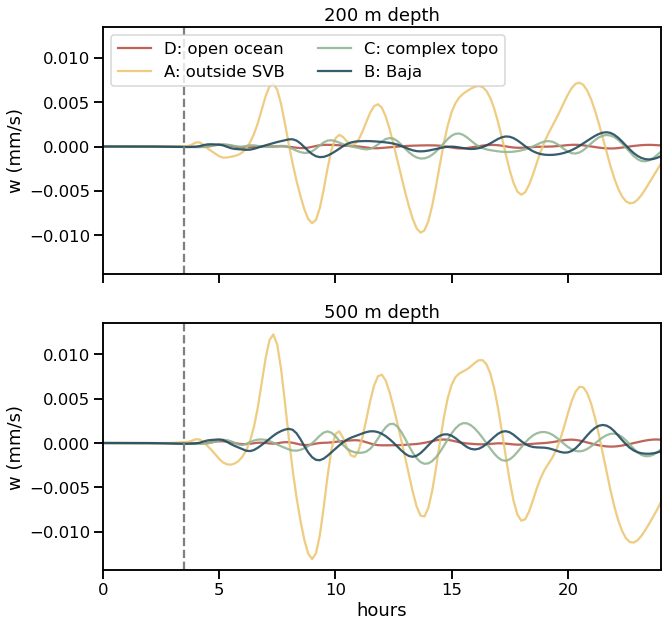

In [11]:
fig, (ax,ax2) = plt.subplots(2,1,figsize=(10,10), sharex=True, sharey=True)
ax.plot(times[:]/3600, var['w200'][0,:]*1000, label='D: open ocean', 
        color=colors[0],alpha=0.9)
ax.plot(times[:]/3600, var['w200'][1,:]*1000, label='A: outside SVB',
        color=colors[1],alpha=0.9)
ax.plot(times[:]/3600, var['w200'][2,:]*1000, label='C: complex topo',
        color=colors[2],alpha=0.9)
ax.plot(times[:]/3600, var['w200'][3,:]*1000, label='B: Baja', 
        color=colors[3],alpha=0.9)
ax.set_xlim(0,24*5)
ax.legend(ncol=2)
ax.set_title('200 m depth')

ax2.plot(times[:]/3600, var['w500'][0,:]*1000, alpha=0.9,
         color=colors[0])
ax2.plot(times[:]/3600, var['w500'][1,:]*1000, alpha=0.9, 
         color=colors[1])
ax2.plot(times[:]/3600, var['w500'][2,:]*1000, alpha=0.9, 
         color=colors[2])
ax2.plot(times[:]/3600, var['w500'][3,:]*1000, alpha=0.9, 
         color=colors[3])
ax2.set_xlim(0,24*1)
ax2.set_xlabel('hours')
ax2.set_title('500 m depth')

for axx in [ax,ax2]:
    axx.set_ylabel('w (mm/s)')
    axx.axvline(3.5, color='0.5', linestyle='--')

Let's see the phases, w at 500 m , different y-scale:

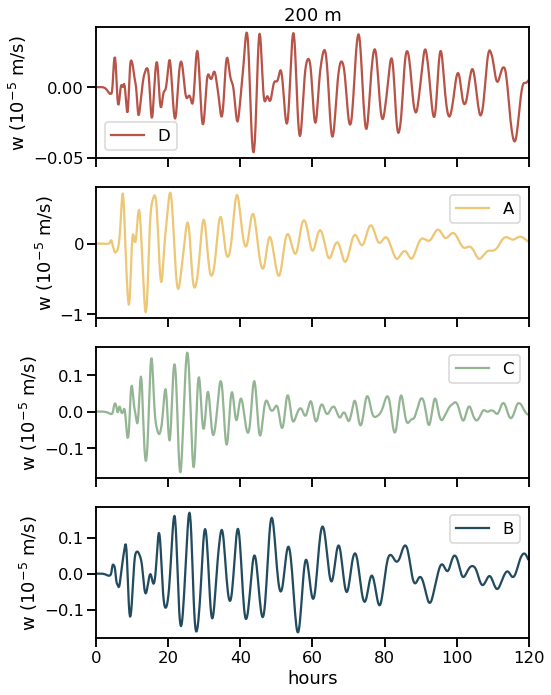

In [12]:
fig, (ax,ax2,ax3,ax4) = plt.subplots(4,1,figsize=(8,10), sharex=True)
ax.plot(times[:]/3600, var['w200'][0,:]*1E5, label='D', 
        color=colors[0], alpha=1)
ax2.plot(times[:]/3600, var['w200'][1,:]*1E5, label='A', 
        color=colors[1], alpha=1)
ax3.plot(times[:]/3600, var['w200'][2,:]*1E5, label='C', 
        color=colors[2], alpha=1)
ax4.plot(times[:]/3600, var['w200'][3,:]*1E5, label='B', 
        color=colors[3], alpha=1)
ax.legend(ncol=2)
ax.set_xlim(0,24*5)

for axx in [ax,ax2,ax3,ax4]:
    axx.set_ylabel('w ($10^{-5}$ m/s)')
    axx.legend()
ax.set_title('200 m')
ax4.set_xlabel('hours')
plt.tight_layout()

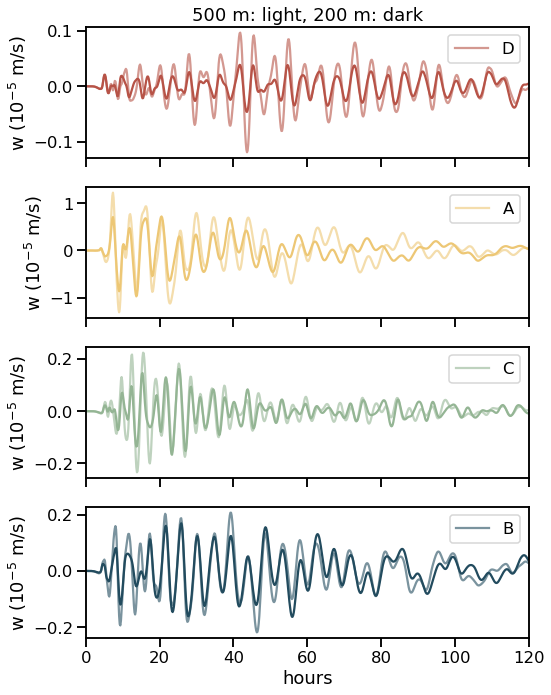

In [13]:
fig, (ax,ax2,ax3,ax4) = plt.subplots(4,1,figsize=(8,10), sharex=True)
ax.plot(times[:]/3600, var['w500'][0,:]*1E5, label='D', 
        color=colors[0], alpha=0.6)
ax.plot(times[:]/3600, var['w200'][0,:]*1E5, 
        color=colors[0], alpha=1)

ax2.plot(times[:]/3600, var['w500'][1,:]*1E5, label='A', 
        color=colors[1], alpha=0.6)
ax2.plot(times[:]/3600, var['w200'][1,:]*1E5, 
        color=colors[1], alpha=1)

ax3.plot(times[:]/3600, var['w500'][2,:]*1E5, label='C', 
        color=colors[2], alpha=0.6)
ax3.plot(times[:]/3600, var['w200'][2,:]*1E5, 
        color=colors[2], alpha=1)

ax4.plot(times[:]/3600, var['w500'][3,:]*1E5, label='B', 
        color=colors[3], alpha=0.6)
ax4.plot(times[:]/3600, var['w200'][3,:]*1E5, 
        color=colors[3], alpha=1)

ax.legend(ncol=2)
ax.set_xlim(0,24*5)

for axx in [ax,ax2,ax3,ax4]:
    axx.set_ylabel('w ($10^{-5}$ m/s)')
    axx.legend()
ax.set_title('500 m: light, 200 m: dark')
ax4.set_xlabel('hours')
plt.tight_layout()

w spectra at 200 m (considering 5 days):

0.987232
0.974759
1.056951
1.016141


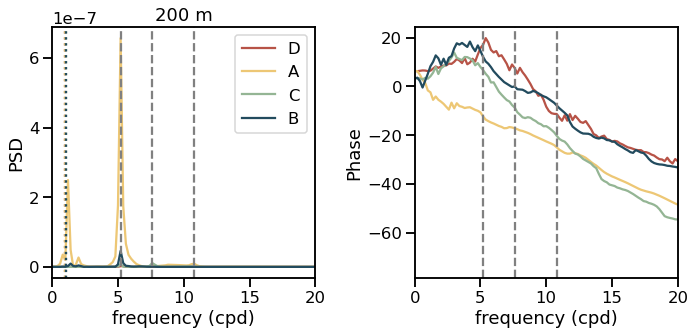

In [14]:
fig, (ax, ax2) = plt.subplots(1,2,figsize=(10,5))

st_names=['D','A','C','B']
for st, st_name, col, ind in zip(range(4),st_names, colors, [pta,ptb,ptc,ptd]):
    signalFFT = np.fft.rfft(var['w200'][st,:])
    
    ## Get Power Spectral Density
    signalPSD = np.abs(signalFFT) ** 2
    #signalPSD /= len(signalFFT)**2

    ## Get Phase
    signalPhase = np.angle(signalFFT)

    ## Get frequencies corresponding to signal 
    fftFreq = np.fft.rfftfreq(len(var['w200'][st,:]), dt)

    ax.plot(fftFreq*86400,signalPSD[:], label=st_name,color=col)
    ax2.plot(fftFreq*86400,np.unwrap(signalPhase[:]+np.pi), 
             color=col,label=st_name)
    f = 86400*2*omega*np.sin(np.radians(lat[ind[1]]))/(2*np.pi) #cpd
    print('%f' %f)
    ax.axvline(f, color=col, linestyle=':')
    ax.axvline(N200*86400, color=col, linestyle=':')

ax.legend()
ax.set_xlabel('frequency (cpd)')
ax.set_ylabel('PSD')
ax2.set_xlabel('frequency (cpd)')
ax2.set_ylabel('Phase')
ax.set_xlim(0,20)
ax2.set_xlim(0,20)
ax.set_title('200 m')

for axx in [ax,ax2]:
    axx.axvline(5.2, color='0.5', linestyle='--')
    axx.axvline(7.6, color='0.5', linestyle='--')
    axx.axvline(10.8, color='0.5', linestyle='--')

plt.tight_layout()
plt.show()

Oh, power for SVB is much larger. Let's see the spectra without station B:

0.987232
0.974759
1.056951


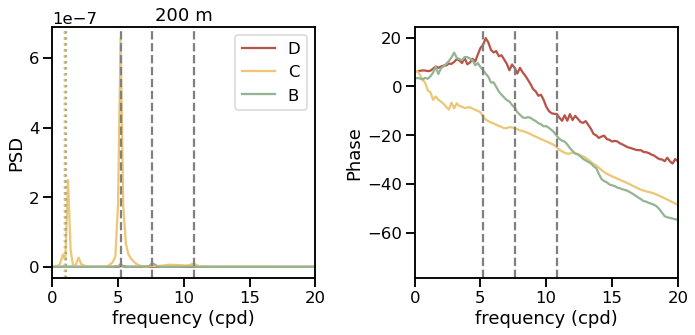

In [15]:
fig, (ax, ax2) = plt.subplots(1,2,figsize=(10,5))
st_names=['D','C','B']
for st, st_name, col, ind in zip(range(4), st_names, colors, [pta,ptb,ptc,ptd]):
    col=colors[st]
    signalFFT = np.fft.rfft(var['w200'][st,:])
    
    ## Get Power Spectral Density
    signalPSD = np.abs(signalFFT) ** 2
    #signalPSD /= len(signalFFT)**2

    ## Get Phase
    signalPhase = np.angle(signalFFT)

    ## Get frequencies corresponding to signal 
    fftFreq = np.fft.rfftfreq(len(var['w200'][st,:]), dt)

    ax.plot(fftFreq*86400,signalPSD[:],col, label=st_name)
    ax2.plot(fftFreq*86400,np.unwrap(signalPhase[:]+np.pi),col,
             label=st_name)
    f = 86400*2*omega*np.sin(np.radians(lat[ind[1]]))/(2*np.pi) #cpd
    print('%f' %f)
    ax.axvline(f, color=col, linestyle=':')
    ax.axvline(N200*86400, color=col, linestyle=':')

ax.legend()
ax.set_xlabel('frequency (cpd)')
ax.set_ylabel('PSD')
ax2.set_xlabel('frequency (cpd)')
ax2.set_ylabel('Phase')
ax.set_xlim(0,20)
ax2.set_xlim(0,20)
ax.set_title('200 m')
for axx in [ax,ax2]:
    axx.axvline(5.2, color='0.5', linestyle='--')
    axx.axvline(7.6, color='0.5', linestyle='--')
    axx.axvline(10.8, color='0.5', linestyle='--')

plt.tight_layout()
plt.show()

And all stations in log version:

0.987232
0.974759
1.056951
1.016141


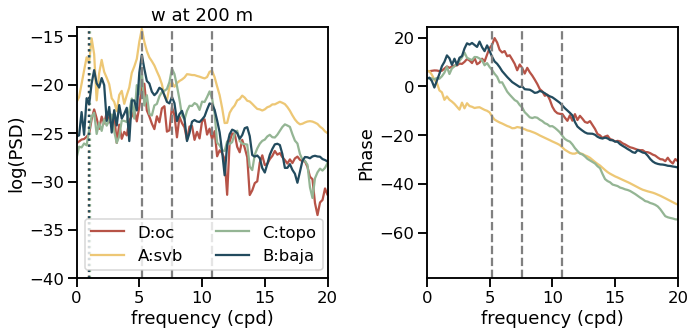

In [16]:
fig, (ax, ax2) = plt.subplots(1,2,figsize=(10,5))

st_names=['D:oc','A:svb','C:topo','B:baja']
for st, st_name, col, ind in zip(range(4), st_names, colors, [pta,ptb,ptc,ptd]):
    signalFFT = np.fft.rfft(var['w200'][st,:])
    
    ## Get Power Spectral Density
    signalPSD = np.abs(signalFFT) ** 2
    #signalPSD /= len(signalFFT)**2

    ## Get Phase
    signalPhase = np.angle(signalFFT)

    ## Get frequencies corresponding to signal 
    fftFreq = np.fft.rfftfreq(len(var['w200'][st,:]), dt)

    ax.plot(fftFreq*86400,np.log(signalPSD[:]),col,label=st_name)
    ax2.plot(fftFreq*86400,np.unwrap(signalPhase[:]+np.pi),col, label=st_name)
    f = 86400*2*omega*np.sin(np.radians(lat[ind[1]]))/(2*np.pi) #cpd
    print('%f' %f)
    ax.axvline(f, color=col, linestyle=':')
    ax.axvline(N200*86400, color=col, linestyle=':')

ax.legend(ncol=2)
ax.set_xlabel('frequency (cpd)')
ax.set_ylabel('log(PSD)')
ax2.set_xlabel('frequency (cpd)')
ax2.set_ylabel('Phase')
ax.set_xlim(0,20)
ax2.set_xlim(0,20)
ax.set_title('w at 200 m')
for axx in [ax,ax2]:
    axx.axvline(5.2, color='0.5', linestyle='--')
    axx.axvline(7.6, color='0.5', linestyle='--')
    axx.axvline(10.8, color='0.5', linestyle='--')

ax.set_ylim(-40,-14)
plt.tight_layout()
plt.show()

Now, spectra of w at 500 m:

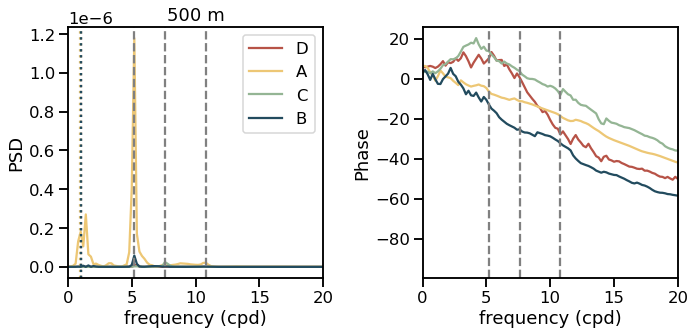

In [17]:
fig, (ax, ax2) = plt.subplots(1,2,figsize=(10,5))

st_names=['D','A','C','B']
for st, st_name, col, ind in zip(range(4), st_names, colors, [pta,ptb,ptc,ptd]):
    signalFFT = np.fft.rfft(var['w500'][st,:])
    
    ## Get Power Spectral Density
    signalPSD = np.abs(signalFFT) ** 2
    #signalPSD /= len(signalFFT)**2

    ## Get Phase
    signalPhase = np.angle(signalFFT)

    ## Get frequencies corresponding to signal 
    fftFreq = np.fft.rfftfreq(len(var['w500'][st,:]), dt)

    ax.plot(fftFreq*86400,signalPSD[:], label=st_name,color=col)
    ax2.plot(fftFreq*86400,np.unwrap(signalPhase[:]+np.pi), 
             color=col,label=st_name)
    f = 86400*2*omega*np.sin(np.radians(lat[ind[1]]))/(2*np.pi) #cpd
    ax.axvline(f, color=col, linestyle=':')
    ax.axvline(N500*86400, color=col, linestyle=':')

ax.legend()
ax.set_xlabel('frequency (cpd)')
ax.set_ylabel('PSD')
ax2.set_xlabel('frequency (cpd)')
ax2.set_ylabel('Phase')
ax.set_xlim(0,20)
ax2.set_xlim(0,20)
ax.set_title('500 m')

for axx in [ax,ax2]:
    axx.axvline(5.2, color='0.5', linestyle='--')
    axx.axvline(7.6, color='0.5', linestyle='--')
    axx.axvline(10.8, color='0.5', linestyle='--')

plt.tight_layout()
plt.show()

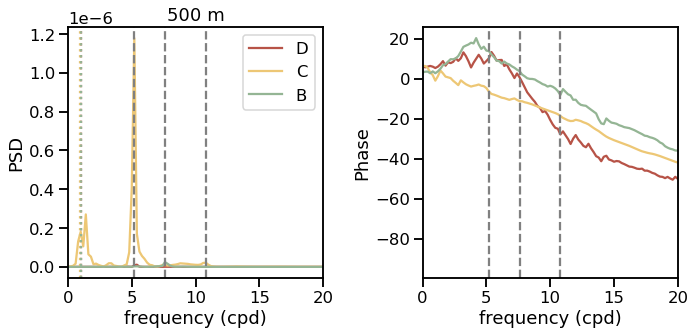

In [18]:
fig, (ax, ax2) = plt.subplots(1,2,figsize=(10,5))

st_names=['D','C','B']
for st, st_name, col, ind in zip(range(4), st_names, colors, [pta,ptb,ptc,ptd]):
    col=colors[st]
    signalFFT = np.fft.rfft(var['w500'][st,:])
    
    ## Get Power Spectral Density
    signalPSD = np.abs(signalFFT) ** 2
    #signalPSD /= len(signalFFT)**2

    ## Get Phase
    signalPhase = np.angle(signalFFT)

    ## Get frequencies corresponding to signal 
    fftFreq = np.fft.rfftfreq(len(var['w500'][st,:]), dt)

    ax.plot(fftFreq*86400,signalPSD[:], label=st_name,color=col)
    ax2.plot(fftFreq*86400,np.unwrap(signalPhase[:]+np.pi), 
             color=col,label=st_name)
    f = 86400*2*omega*np.sin(np.radians(lat[ind[1]]))/(2*np.pi) #cpd
    ax.axvline(f, color=col, linestyle=':')
    ax.axvline(N500*86400, color=col, linestyle=':')

ax.legend()
ax.set_xlabel('frequency (cpd)')
ax.set_ylabel('PSD')
ax2.set_xlabel('frequency (cpd)')
ax2.set_ylabel('Phase')
ax.set_xlim(0,20)
ax2.set_xlim(0,20)
ax.set_title('500 m')

for axx in [ax,ax2]:
    axx.axvline(5.2, color='0.5', linestyle='--')
    axx.axvline(7.6, color='0.5', linestyle='--')
    axx.axvline(10.8, color='0.5', linestyle='--')

plt.tight_layout()
plt.show()

0.987232
0.974759
1.056951
1.016141


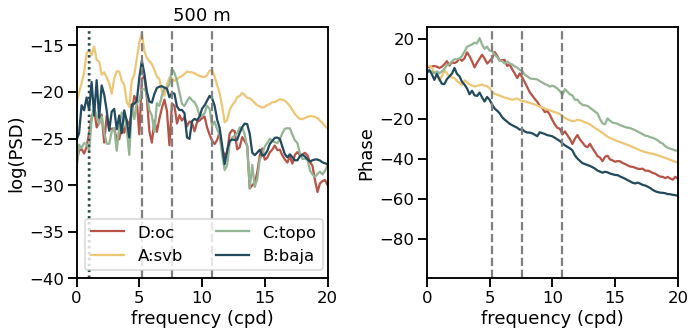

In [19]:
fig, (ax, ax2) = plt.subplots(1,2,figsize=(10,5))

st_names=['D:oc','A:svb','C:topo','B:baja']
for st, st_name, col, ind in zip(range(4), st_names, colors, [pta,ptb,ptc,ptd]):
    signalFFT = np.fft.rfft(var['w500'][st,:])
    
    ## Get Power Spectral Density
    signalPSD = np.abs(signalFFT) ** 2
    #signalPSD /= len(signalFFT)**2

    ## Get Phase
    signalPhase = np.angle(signalFFT)

    ## Get frequencies corresponding to signal 
    fftFreq = np.fft.rfftfreq(len(var['w500'][st,:]), dt)

    ax.plot(fftFreq*86400,np.log(signalPSD[:]),col,label=st_name)
    ax2.plot(fftFreq*86400,np.unwrap(signalPhase[:]+np.pi),col, label=st_name)
    f = 86400*2*omega*np.sin(np.radians(lat[ind[1]]))/(2*np.pi) #cpd
    print('%f' %f)
    ax.axvline(f, color=col, linestyle=':')
    ax.axvline(N500*86400, color=col, linestyle=':')

ax.legend(ncol=2)
ax.set_xlabel('frequency (cpd)')
ax.set_ylabel('log(PSD)')
ax2.set_xlabel('frequency (cpd)')
ax2.set_ylabel('Phase')
ax.set_xlim(0,20)
ax2.set_xlim(0,20)
ax.set_title('500 m')
for axx in [ax,ax2]:
    axx.axvline(5.2, color='0.5', linestyle='--')
    axx.axvline(7.6, color='0.5', linestyle='--')
    axx.axvline(10.8, color='0.5', linestyle='--')

ax.set_ylim(-40,-13)
plt.tight_layout()
plt.show()

What does SVB-induced w look like vertically at all 4 stations? Let's see...

In [22]:
wvec = np.zeros((720,76))

for tt in range(wvec.shape[0]):
   wvec[tt,:] = np.squeeze(ds.WVEL[tt,:,pta[1],pta[0]].data-ds2.WVEL[tt,:,pta[1],pta[0]].data)
   if tt%10 == 0:
       print(tt)

np.savez('wanom_tz_stA_AugTS', w_stA=wvec) 

0
10
20
30
40
50
60
70
80
90
100
110
120
130
140
150
160
170
180
190
200
210
220
230
240
250
260
270
280
290
300
310
320
330
340
350
360
370
380
390
400
410
420
430
440
450
460
470
480
490
500
510
520
530
540
550
560
570
580
590
600
610
620
630
640
650
660
670
680
690
700
710


In [24]:
wvec = np.zeros((720,76))

for tt in range(wvec.shape[0]):
   wvec[tt,:] = np.squeeze(ds.WVEL[tt,:,ptb[1],ptb[0]].data-ds2.WVEL[tt,:,ptb[1],ptb[0]].data)
   if tt%10 == 0:
       print(tt)

np.savez('wanom_tz_stB_AugTS', w_stB=wvec) 

0
10
20
30
40
50
60
70
80
90
100
110
120
130
140
150
160
170
180
190
200
210
220
230
240
250
260
270
280
290
300
310
320
330
340
350
360
370
380
390
400
410
420
430
440
450
460
470
480
490
500
510
520
530
540
550
560
570
580
590
600
610
620
630
640
650
660
670
680
690
700
710


In [25]:
wvec = np.zeros((720,76))

for tt in range(wvec.shape[0]):
   wvec[tt,:] = np.squeeze(ds.WVEL[tt,:,ptc[1],ptc[0]].data-ds2.WVEL[tt,:,ptc[1],ptc[0]].data)
   if tt%10 == 0:
       print(tt)

np.savez('wanom_tz_stC_AugTS', w_stC=wvec) 

0
10
20
30
40
50
60
70
80
90
100
110
120
130
140
150
160
170
180
190
200
210
220
230
240
250
260
270
280
290
300
310
320
330
340
350
360
370
380
390
400
410
420
430
440
450
460
470
480
490
500
510
520
530
540
550
560
570
580
590
600
610
620
630
640
650
660
670
680
690
700
710


In [26]:
wvec = np.zeros((720,76))

for tt in range(wvec.shape[0]):
    wvec[tt,:] = np.squeeze(ds.WVEL[tt,:,ptd[1],ptd[0]].data-ds2.WVEL[tt,:,ptd[1],ptd[0]].data)
    if tt%10 == 0:
        print(tt)

np.savez('wanom_tz_stD_AugTS', w_stD=wvec) 

0
10
20
30
40
50
60
70
80
90
100
110
120
130
140
150
160
170
180
190
200
210
220
230
240
250
260
270
280
290
300
310
320
330
340
350
360
370
380
390
400
410
420
430
440
450
460
470
480
490
500
510
520
530
540
550
560
570
580
590
600
610
620
630
640
650
660
670
680
690
700
710


Text(0.5, 1.0, 'Station D: open ocean')

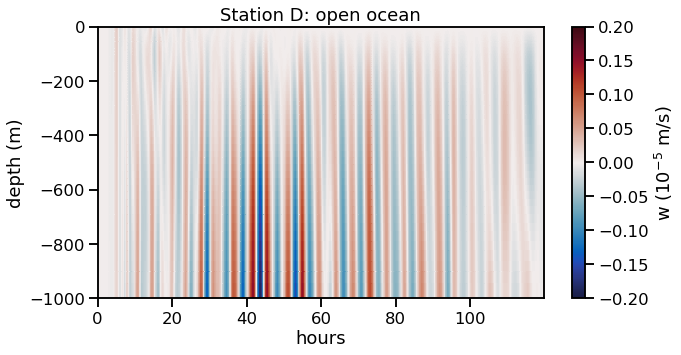

In [27]:
varw = np.load('wanom_tz_stA_AugTS.npz')
fig, (ax) = plt.subplots(1,1, figsize=(10,5))
pc = ax.pcolormesh(times/3600,Zl,np.transpose(varw["w_stA"])*1E5,
                   cmap=cmo.cm.balance, vmin=-0.2, vmax=0.2)
plt.colorbar(pc, label='w (10$^{-5}$ m/s)')
ax.set_ylim(-1000,0)
ax.set_xlabel('hours')
ax.set_ylabel('depth (m)')
ax.set_title('Station D: open ocean')

Text(0.5, 1.0, 'Station A: outside SVB')

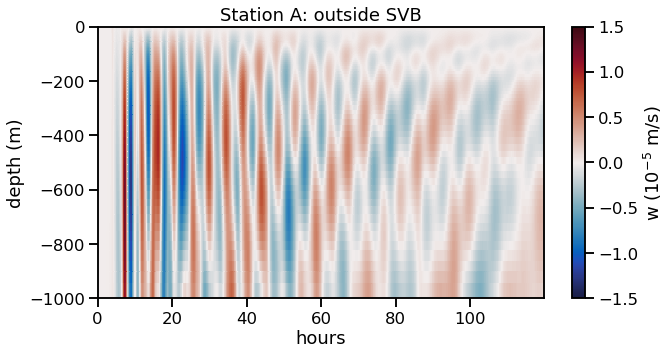

In [28]:
varw = np.load('wanom_tz_stB_AugTS.npz')
fig, (ax) = plt.subplots(1,1, figsize=(10,5))
pc = ax.pcolormesh(times/3600,Zl,np.transpose(varw["w_stB"])*1E5,
                   cmap=cmo.cm.balance, vmin=-1.5, vmax=1.5)
plt.colorbar(pc, label='w (10$^{-5}$ m/s)')
ax.set_ylim(-1000,0)
ax.set_xlabel('hours')
ax.set_ylabel('depth (m)')
ax.set_title('Station A: outside SVB')

Text(0.5, 1.0, 'Station C: complex topography')

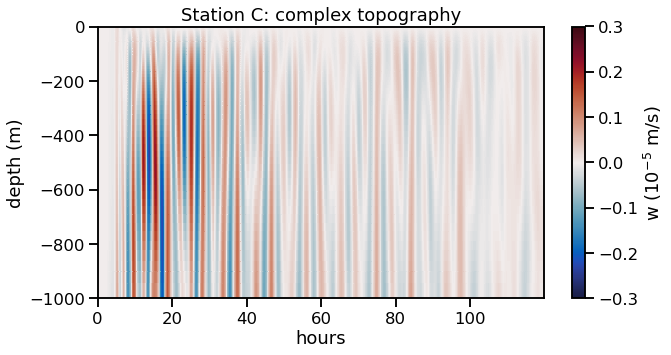

In [29]:
varw = np.load('wanom_tz_stC_AugTS.npz')
fig, (ax) = plt.subplots(1,1, figsize=(10,5))
pc = ax.pcolormesh(times/3600,Zl,np.transpose(varw["w_stC"])*1E5,
                   cmap=cmo.cm.balance, vmin=-0.3, vmax=0.3)
plt.colorbar(pc, label='w (10$^{-5}$ m/s)')
ax.set_ylim(-1000,0)
ax.set_xlabel('hours')
ax.set_ylabel('depth (m)')
ax.set_title('Station C: complex topography')

Text(0.5, 1.0, 'Station B: Baja')

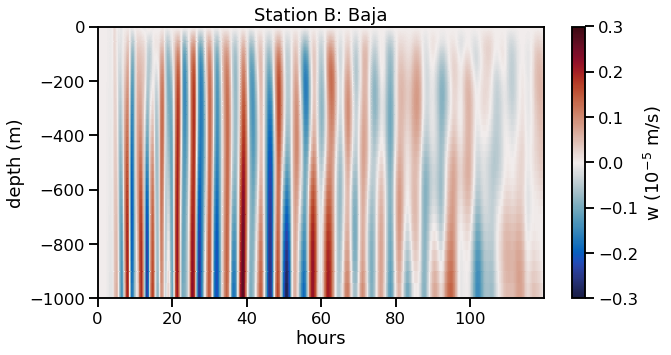

In [30]:
varw = np.load('wanom_tz_stD_AugTS.npz')
fig, (ax) = plt.subplots(1,1, figsize=(10,5))
pc = ax.pcolormesh(times/3600,Zl,np.transpose(varw["w_stD"])*1E5,
                   cmap=cmo.cm.balance, vmin=-0.3, vmax=0.3)
plt.colorbar(pc, label='w (10$^{-5}$ m/s)')
ax.set_ylim(-1000,0)
ax.set_xlabel('hours')
ax.set_ylabel('depth (m)')
ax.set_title('Station B: Baja')

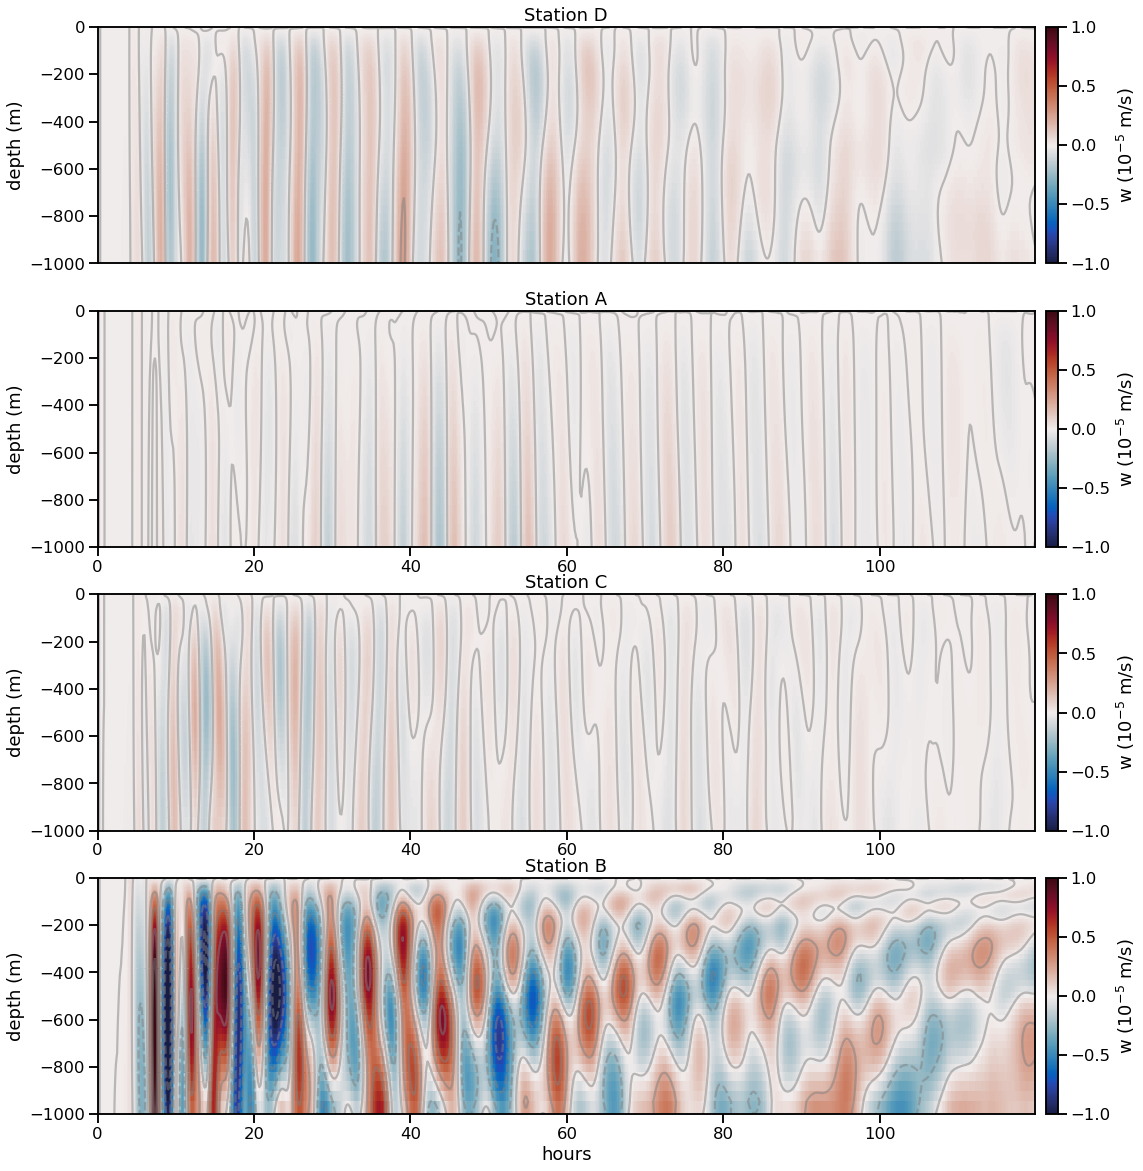

In [31]:
fig, (ax,ax2,ax3,ax4) = plt.subplots(4,1, figsize=(20,20))

for axx,st in zip([ax,ax2,ax3,ax4],['D','A','C','B']):
    varw = np.load('wanom_tz_st%s_AugTS.npz' %st)
    pc = axx.pcolormesh(times/3600,Zl,
                       np.transpose(varw["w_st%s" %st])*1E5,
                       cmap=cmo.cm.balance, vmin=-1., vmax=1.)
    plt.colorbar(pc,ax=axx, label='w (10$^{-5}$ m/s)',pad=0.01)
    pc = axx.contour(times/3600,Zl,
                     np.transpose(varw["w_st%s" %st])*1E5,
                     levels=[-1,-0.75,-0.5,-0.25,0,0.25,0.5,0.75,1],
                     colors=['0.5'], alpha=0.5)
    
    axx.set_ylim(-1000,0)
    axx.set_title('Station %s' %st)
    axx.set_ylabel('depth (m)')

ax4.set_xlabel('hours')
for axx in [ax,ax2,ax3]:
    ax.set_xticks([])

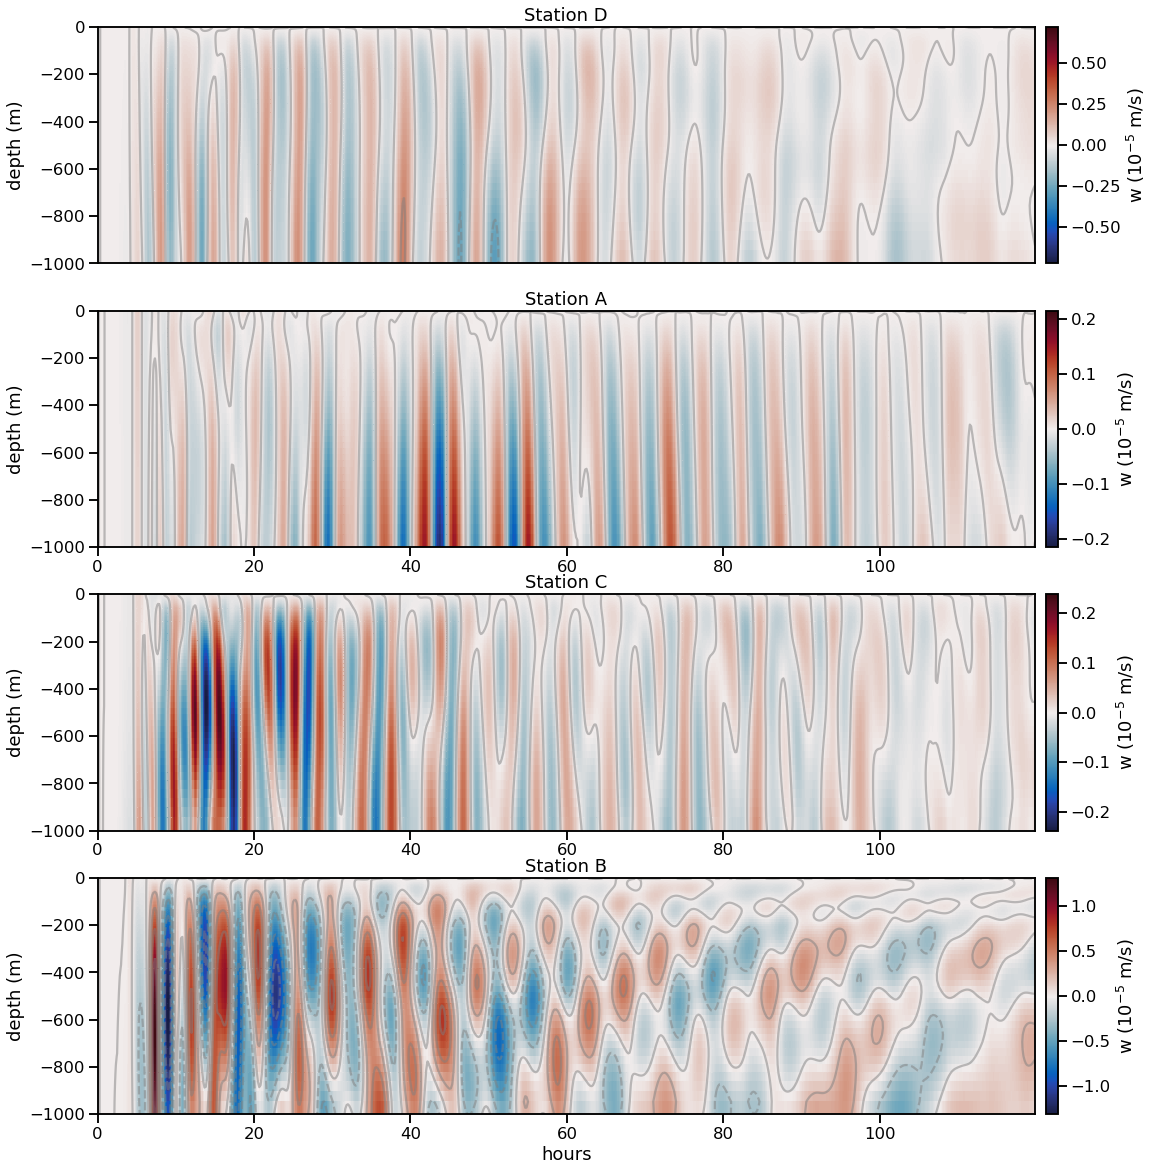

In [32]:
fig, (ax,ax2,ax3,ax4) = plt.subplots(4,1, figsize=(20,20))

for axx,st in zip([ax,ax2,ax3,ax4],['D','A','C','B']):
    varw = np.load('wanom_tz_st%s_AugTS.npz' %st)
    pc = axx.pcolormesh(times/3600,Zl,
                       np.transpose(varw["w_st%s" %st])*1E5,
                       cmap=cmo.cm.balance, 
                       vmin=np.min(varw["w_st%s" %st])*1E5, 
                       vmax=-np.min(varw["w_st%s" %st])*1E5)
    plt.colorbar(pc,ax=axx, label='w (10$^{-5}$ m/s)',pad=0.01)
    pc = axx.contour(times/3600,Zl,
                     np.transpose(varw["w_st%s" %st])*1E5,
                     levels=[-1,-0.75,-0.5,-0.25,0,0.25,0.5,0.75,1],
                     colors=['0.5'], alpha=0.5)
    
    axx.set_ylim(-1000,0)
    axx.set_title('Station %s' %st)
    axx.set_ylabel('depth (m)')

ax4.set_xlabel('hours')
for axx in [ax,ax2,ax3]:
    ax.set_xticks([])

In [33]:
# masks
mask_exp = np.expand_dims(ds.maskC, axis=0)
nt = 720
nz = np.shape(ds.k)[0]
ny = np.shape(ds.YC)[0]
nx = np.shape(ds.XC)[1]
mask_exp = mask_exp + np.zeros((nt,nz,ny,nx))

MemoryError: Unable to allocate 128. GiB for an array with shape (720, 76, 612, 512) and data type float64

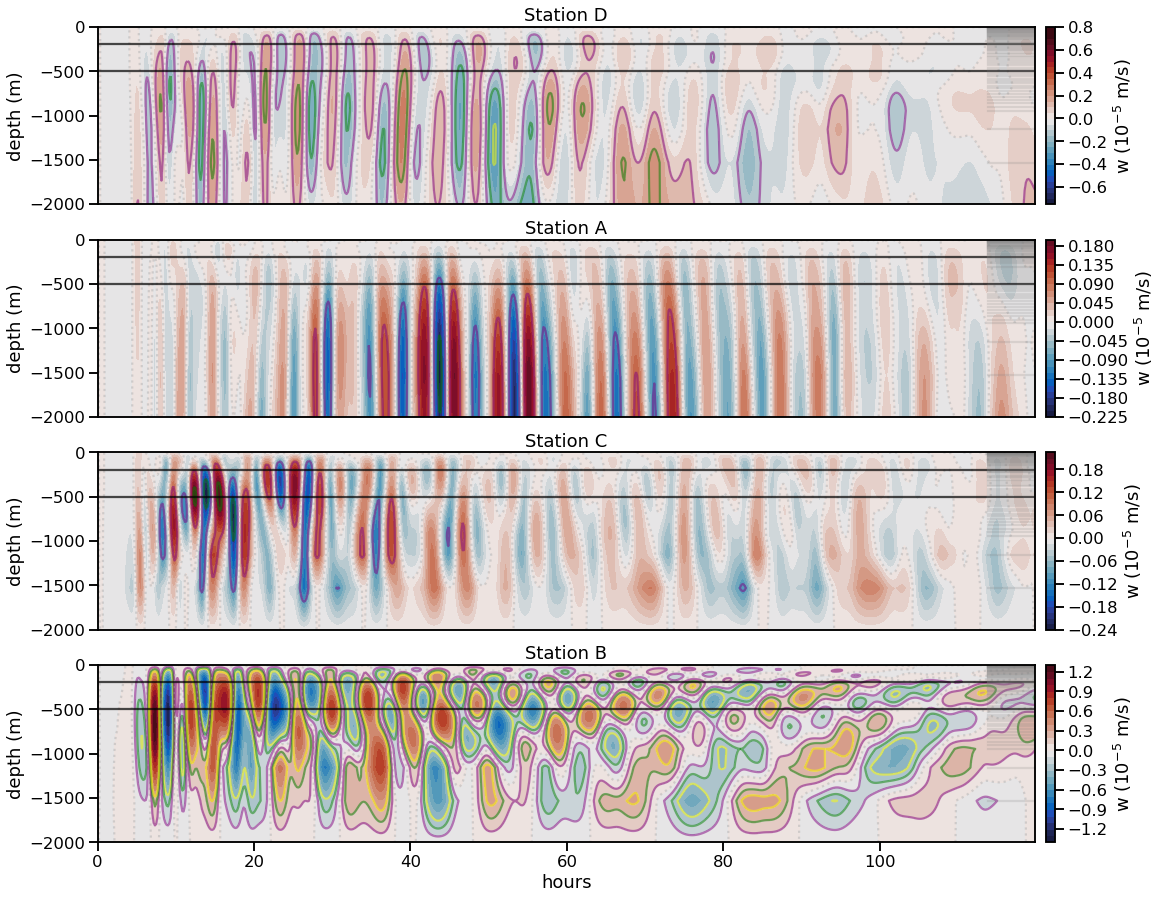

In [34]:
fig, (ax,ax2,ax3,ax4) = plt.subplots(4,1, figsize=(20,15))
ax4.set_facecolor('tan')
ax4.set_ylim(-2000,0)
for axx,st,pt in zip([ax,ax2,ax3,ax4],['D','A','C','B'],[pta,ptb,ptc,ptd]):
    varw = np.load('wanom_tz_st%s_AugTS.npz' %st)
    pc = axx.contourf(times/3600,Zl,
                      np.transpose(varw["w_st%s" %st])*1E5,30,
                       cmap=cmo.cm.balance, 
                       vmin=np.min(varw["w_st%s" %st])*1E5, 
                       vmax=-np.min(varw["w_st%s" %st])*1E5)
    plt.colorbar(pc,ax=axx, label='w (10$^{-5}$ m/s)',pad=0.01)
    pc = axx.contour(times/3600,Zl,
                     np.transpose(varw["w_st%s" %st])*1E5,
                     levels=[-0.3,-0.2,-0.1,0,0.1,0.2,0.3], alpha=0.5,
                     linestyles=['-','-','-',':','-','-','-'],
                     colors=['yellow','green','purple','0.7','purple','green','yellow'])
    
    axx.set_title('Station %s' %st)
    axx.set_ylabel('depth (m)')
    axx.axhline(-197, color='black', alpha=0.7)
    axx.axhline(-500, color='black', alpha=0.7)
    for kk in Zl:
        axx.axhline(kk,xmin=0.95, xmax=1, color='0.5', alpha=0.2)
  
ax4.set_xlabel('hours')
for axx in [ax,ax2,ax3]:
    axx.set_xticks([])
    axx.set_facecolor('tan')
    axx.set_ylim(-2000,0)

In [35]:
f = 3600*(2*omega*np.sin(np.radians(lat[ind[1]])))/(2*np.pi) #cpd
print('%f' %f)

0.042339


In [36]:
(N500)*3600

13.0104

In [37]:
np.shape(mask_exp)

(1, 76, 612, 512)

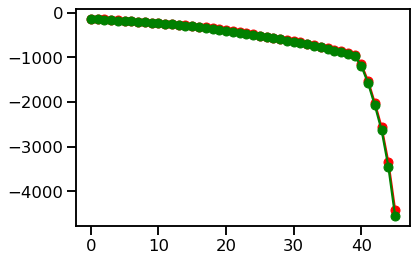

In [38]:
plt.plot(ds.Zl.isel(k_l=range(30,76)), '-ro')
plt.plot(ds.Z.isel(k=range(30,76)), '-go')

In [39]:
ds

<xarray.Dataset>
Dimensions:  (i: 512, i_g: 512, j: 612, j_g: 612, k: 76, k_l: 76, k_p1: 77, k_u: 76, time: 720)
Coordinates: (12/45)
  * k_p1     (k_p1) int64 1 2 3 4 5 6 7 8 9 10 ... 69 70 74 79 84 89 94 99 100
  * i        (i) int64 0 1 2 3 4 5 6 7 8 ... 503 504 505 506 507 508 509 510 511
  * i_g      (i_g) int64 0 1 2 3 4 5 6 7 8 ... 504 505 506 507 508 509 510 511
  * j        (j) int64 0 1 2 3 4 5 6 7 8 ... 603 604 605 606 607 608 609 610 611
  * j_g      (j_g) int64 0 1 2 3 4 5 6 7 8 ... 604 605 606 607 608 609 610 611
  * k        (k) int64 1 2 3 4 5 6 7 8 9 10 11 ... 67 68 69 70 74 79 84 89 94 99
    ...       ...
    rhoRef   (k) >f8 dask.array<chunksize=(76,), meta=np.ndarray>
    dxV      (j_g, i_g) >f8 dask.array<chunksize=(612, 512), meta=np.ndarray>
    dyF      (j, i) >f8 dask.array<chunksize=(612, 512), meta=np.ndarray>
    dxF      (j, i) >f8 dask.array<chunksize=(612, 512), meta=np.ndarray>
    iter     (time) int64 dask.array<chunksize=(1,), meta=np.ndarray>
  * time     (time) timedelta64[ns] 00:00:10 00:00:20 ... 01:59:50 02:00:00
Data variables:
    THETA    (time, k, j, i) float64 dask.array<chunksize=(1, 76, 612, 512), meta=np.ndarray>
    SALT     (time, k, j, i) float64 dask.array<chunksize=(1, 76, 612, 512), meta=np.ndarray>
    UVEL     (time, k, j, i_g) float64 dask.array<chunksize=(1, 76, 612, 512), meta=np.ndarray>
    VVEL     (time, k, j_g, i) float64 dask.array<chunksize=(1, 76, 612, 512), meta=np.ndarray>
    WVEL     (time, k_l, j, i) float64 dask.array<chunksize=(1, 76, 612, 512), meta=np.ndarray>
    ETAN     (time, j, i) float64 dask.array<chunksize=(1, 612, 512), meta=np.ndarray>

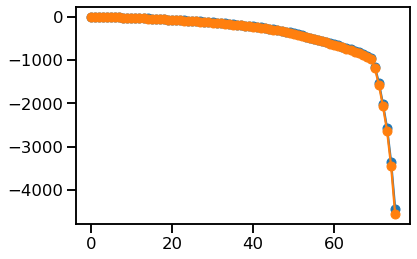

In [40]:
plt.plot(ds.Zl, '-o')
plt.plot(ds.Z, '-o')